<h1><font color=#000066	> Advanced Systems Project: Data Analysis on YELP application reviews. </font></h1>

<br/><i>Analysis performed by: Sujeeth Nidumolu 
<br>Student ID: 700372902</br>
<br>Under the supervision of Dr. Someswar Kesh</br>
<br>Term: Fall-2018</br>
<br>Computer Information Systems - University of Central Missouri</br></i>

<body><br/>Yelp is a trending application designed for the users to publish and read the reviews of local businesses such as restaurants, saloons, automobiles workshops etc. Also, it provides online reservations through Yelp reservations. With the broad range online services generating huge data day to day. 
The goal is to analyze this unorganized data, design a system to generate insights from the Yelp data which could help the entrepreneurs to study the progress of the business and take wise decisions towards betterment of the business. With the Yelp’s data, the primary task is to derive insights from various reviews from customers, data being acquired from various places across USA.

### Determining the day and time in a week receiving highest number of check-ins.

Importing the packages and reading the "yelp_checkin" dataset.

In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
checkins = pd.read_csv('yelp_checkin.csv') #Reading 'yelp_checkin.csv' dataset

In [3]:
checkinsdf = pd.DataFrame(checkins) #Feeding the data into a dataframe

In [4]:
checkinsdf.columns #Displays the columns in the table

Index(['business_id', 'weekday', 'hour', 'checkins'], dtype='object')

In [5]:
checkinsdf.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [6]:
(checkinsdf.astype(np.object) == '?').any() #Checking for null/empty values if any in the table

business_id    False
weekday        False
hour           False
checkins       False
dtype: bool

Cool! No null values, we can now proceed with the analysis using the existing data.

Now, let us see which weekday has received highest number of checkins, the cell below displays the day with checkins

In [7]:
highestcheckinsday = checkinsdf[['weekday', 'checkins']].groupby('weekday').count()

In [8]:
print(highestcheckinsday)

         checkins
weekday          
Fri        584790
Mon        500373
Sat        653551
Sun        567181
Thu        545489
Tue        522104
Wed        537730


In [9]:
highestcheckinsday.sort_values('checkins', ascending=False) #Sorting the column in descending order

,checkins
weekday,
Sat,653551
Fri,584790
Sun,567181
Thu,545489
Wed,537730
Tue,522104
Mon,500373


Text(0,0.5,'Number of checkins')

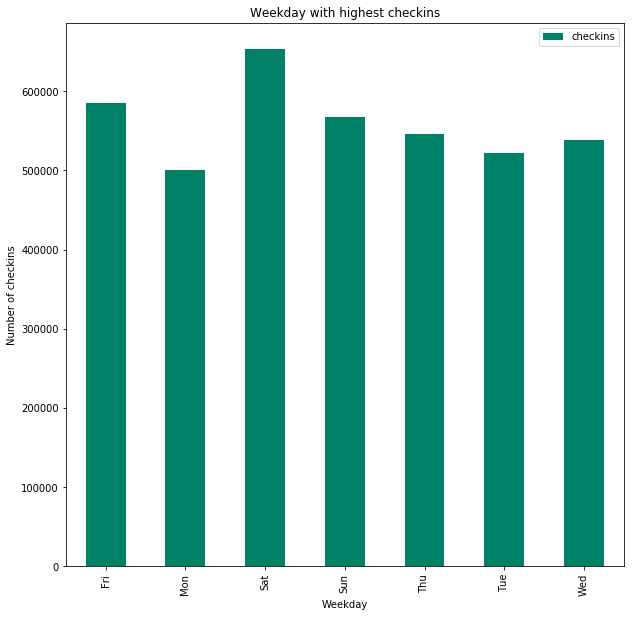

In [10]:
highestcheckinsday.plot(kind='bar', stacked=False, figsize=[10,10], \
                                                 colormap='summer')
plt.title('Weekday with highest checkins') #Giving main title for the graph
plt.xlabel('Weekday') #Giving title for x-axis
plt.ylabel('Number of checkins') #Giving title for y-axis

###### It can depicted from the above stats that "Saturday" has recorded highest number of checkins.

Since we know that "Saturday" has highest number of checkins, let us find the hours in Saturday with highest number of checkins.

In [11]:
highest_checkins_sat = checkins[checkins.weekday == 'Sat'] #Selects all the cells in the table with the weekday as "Saturday"

In [12]:
highest_checkins_sat.head()

,business_id,weekday,hour,checkins
7,OE_IDW5w_W97sBcZvq2Img,Sat,1:00,1
8,gy5pr5bFAjOL5rERSdMCLg,Sat,15:00,1
11,08jURVR_eDvXq9scdIgcmg,Sat,23:00,1
32,uhroo5AV1dcCHpI6ZQIj8w,Sat,23:00,1
39,9dIelLhFGhk49JVW1AHD7Q,Sat,14:00,1


In [13]:
highest_checkins_sat_time = highest_checkins_sat[['hour', 'checkins']]

In [14]:
highest_checkins_sat_time = highest_checkins_sat_time.groupby('hour').count().sort_values('checkins', ascending=False)

In [15]:
highest_checkins_sat_time

,checkins
hour,
19:00,47879
18:00,47552
20:00,46643
21:00,46320
22:00,45228
23:00,43927
0:00,43657
17:00,43371
1:00,39365


Text(0,0.5,'Number of checkins')

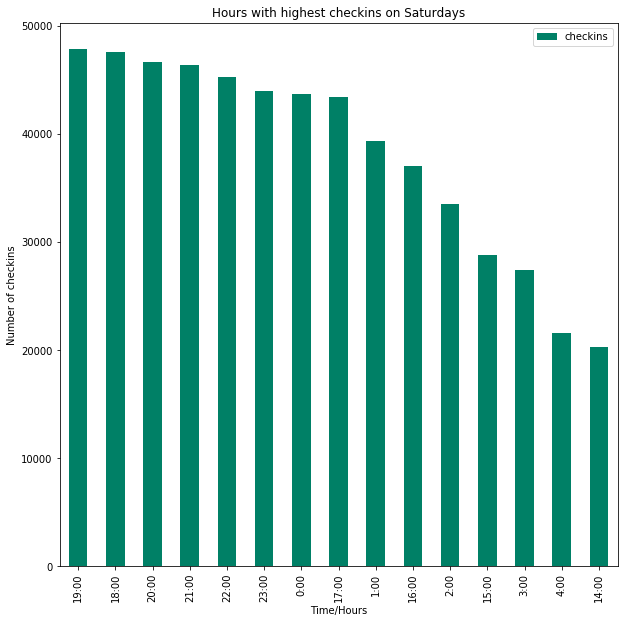

In [18]:
highest_checkins_sat_time[0:15].plot(kind='bar', stacked=False, figsize=[10,10], \
                                                 colormap='summer')
plt.title('Hours with highest checkins on Saturdays') #Giving main title for the graph
plt.xlabel('Time/Hours') #Giving title for x-axis
plt.ylabel('Number of checkins') #Giving title for y-axis

###### As depicted from the above stats, during 19:00hrs highest number of checkins were recorded.

#### Conclusion:

On Saturdays, from 18:00 to 23:00 hrs recorded highest checkins in which 19:00hrs has the maximum check-ins in a week. Hence, this can help the business owners to allocate additional staff during these hours expecting the rush.